In [26]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [27]:
#dataset
x = np.array(([0.9,0.8],[0.6,0.3],[0.9,0.1],[0.9,0.8], [0.2, 0.35], [0.4, 0.39]))  #Features
y = np.array((['Netural'],['Positive'],['Positive'],['Netural'], ['Negative'], ['Negative']))  #Labels (0,1)

In [28]:
#Encode categorical features as a one-hot numeric array.
enc = OneHotEncoder(categories='auto')
y = enc.fit_transform(y.reshape(-1, 1)).toarray()


In [29]:
enc.categories_

[array(['Negative', 'Netural', 'Positive'], dtype='<U8')]

In [30]:
y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [33]:
# Activation function
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

# Activation function
def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)

#Multi-layers feedforward neural network (2 hidden layers)
class NeuralNetwork:
    def __init__(self, x, y, nodes_in_layer1 = 4, nodes_in_layer2 = 3, nodes_in_layer3 = 3, l_rate = 1):
        #define x, y
        self.inputs_in_layer0 = x  #layer 0
        self.y = y
        
        self.l_rate = l_rate  #learning rate
        
        #define and set the number of neurons in each layers
        self.nodes_in_layer1 = nodes_in_layer1
        self.nodes_in_layer2 = nodes_in_layer2
        self.nodes_in_layer3 = nodes_in_layer3
        
        #intialize the wieghts (theta) metrices
        self.thetas_layer0 = np.random.rand(self.inputs_in_layer0.shape[1] + 1,self.nodes_in_layer1)  #shape: [2+1, 4]
        self.thetas_layer1 = np.random.rand(self.nodes_in_layer1 + 1,self.nodes_in_layer2)  #shape: [4+1, 3]
        self.thetas_layer2 = np.random.rand(self.nodes_in_layer2+1, nodes_in_layer3)  # shape: [3+1, 3]

    def feedforward(self):      
        #compute all the nodes (a1, a2, a3, a4) in layer1
        n = self.inputs_in_layer0.shape[0]

        self.Z1 = self.thetas_layer0[0] + np.dot(self.inputs_in_layer0, self.thetas_layer0[1:])
        self.layer1 = sigmoid(self.Z1)  #values of a1, a2, a3, a4 in layer 1
        
        #compute all the nodes (a1, a2, a3) in layer2
        self.Z2 = self.thetas_layer1[0] + np.dot(self.layer1, self.thetas_layer1[1:])
        self.layer2 = sigmoid(self.Z2)  #values of a1, a2, a3 in layer 2
        
        #compute all the nodes (a1, a2, a3) in layer3
        self.Z3 = self.thetas_layer2[0] + np.dot(self.layer2, self.thetas_layer2[1:])
        self.layer3 = softmax(self.Z3)  #output layer      
        
        return self.layer3
    
    def cost_func(self):
        
        self.n = self.inputs_in_layer0.shape[0] #number of training examples
        self.cost = (1/self.n) * np.sum(-self.y * np.log(self.layer3)) #cross entropy
        return self.cost 

    
    def backprop(self):
        
        self.dE_dZ3 = (1/self.n) * (self.layer3 - self.y)

        self.dE_dtheta2 = np.dot(self.layer2.T, self.dE_dZ3)
        self.dE_dbias2 = np.dot(np.ones(self.n), self.dE_dZ3)
        
        #dervative of E with respect to theta and bias in layer1
        self.dE_dlayer2 = np.dot(self.dE_dZ3, self.thetas_layer2[1:].T)
        self.dE_dZ2 = np.multiply(self.dE_dlayer2, sigmoid(self.Z2)* (1-sigmoid(self.Z2)))
        self.dE_dtheta1 = np.dot(self.layer1.T, self.dE_dZ2)
        self.dE_dbias1 = np.dot(np.ones(self.n), self.dE_dZ2)
        
        #dervative of E with respect to theta and bias in layer0
        self.dE_dlayer1 = np.dot(self.dE_dZ2, self.thetas_layer1[1:].T)
        self.dE_dZ1 = np.multiply(self.dE_dlayer1, sigmoid(self.Z1)* (1-sigmoid(self.Z1)))
        self.dE_dtheta0 = np.dot(self.inputs_in_layer0.T, self.dE_dZ1)
        self.dE_dbias0 = np.dot(np.ones(self.n), self.dE_dZ1)
        
        #updating theta using gradient descent in layers 2, 1, and 0
        self.thetas_layer2[1:] = self.thetas_layer2[1:] - self.l_rate * self.dE_dtheta2
        self.thetas_layer1[1:] = self.thetas_layer1[1:] - self.l_rate * self.dE_dtheta1
        self.thetas_layer0[1:] = self.thetas_layer0[1:] - self.l_rate * self.dE_dtheta0
        
        #updating bias using gradient descent in layers 2, 1, and 0
        self.thetas_layer2[0] = self.thetas_layer2[0] - self.l_rate * self.dE_dbias2
        self.thetas_layer1[0] = self.thetas_layer1[0] - self.l_rate * self.dE_dbias1
        self.thetas_layer0[0] = self.thetas_layer0[0] - self.l_rate * self.dE_dbias0
        
        
        return self

In [34]:
NN = NeuralNetwork(x,y)
epochs = 500
losses = []
for i in range(epochs):
    predicted_output = NN.feedforward()
    error = NN.cost_func()
    losses.append(error)
    NN.backprop()
    print ("iteration # ", i+1)
    print ("Actual Output: \n", y)
    print("Predicted Output: \n", predicted_output, "\n")
    print ("Cost: \n" , error, "\n")

iteration #  1
Actual Output: 
 [[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
Predicted Output: 
 [[0.40769601 0.11493697 0.47736702]
 [0.4044248  0.11659697 0.47897823]
 [0.40500902 0.11623062 0.47876037]
 [0.40769601 0.11493697 0.47736702]
 [0.4023584  0.11771274 0.47992886]
 [0.4037762  0.11696964 0.47925416]] 

Cost: 
 1.269450765751729 

iteration #  2
Actual Output: 
 [[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
Predicted Output: 
 [[0.37481942 0.27684262 0.34833797]
 [0.37198598 0.27721249 0.35080152]
 [0.37249944 0.27711066 0.3503899 ]
 [0.37481942 0.27684262 0.34833797]
 [0.37019381 0.27747514 0.35233105]
 [0.37142045 0.27730708 0.35127247]] 

Cost: 
 1.1081674705410922 

iteration #  3
Actual Output: 
 [[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
Predicted Output: 
 [[0.32940476 0.33875267 0.33184257]
 [0.32746876 0.33817031 0.33436092]
 [0.32780114 0.33826324 0.33393562]
 [0.32940476 0.3387526

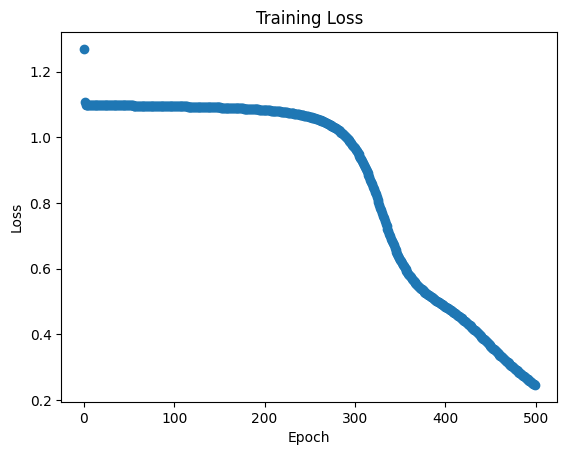

In [35]:
plt.scatter(range(epochs), losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()